<a href="https://colab.research.google.com/github/Smn-7/Riser_Prediction_Neural_Network/blob/main/Riser_Prediction_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install openpyxl

In [ ]:
file_path = '/content/gdrive/My Drive/Colab Notebooks/software dataset.xlsx'

In [ ]:
df = pd.read_excel(file_path)
df

,Cylinder Length (m),Mode,f_s,f_n,z,RMS Amplitude (m)
0,0.5,1,57.600,192.10,0.047,0.05
1,0.5,1,153.700,192.10,0.047,0.60
2,0.5,1,268.900,192.10,0.047,0.70
3,0.5,1,384.200,192.10,0.047,0.20
4,0.5,1,576.300,192.10,0.047,0.00
...,...,...,...,...,...,...
75,5.6,2,0.518,0.78,0.480,0.80
76,5.6,2,0.666,0.78,0.480,0.80
77,5.6,3,0.814,1.22,0.450,0.70
78,5.6,3,0.962,1.22,0.450,0.60


In [ ]:
X = df[['Cylinder Length (m)', 'f_s', 'f_n', 'z' ]].values
Y = df[['RMS Amplitude (m)']].values

In [ ]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

In [ ]:
class MarineRiserNN(nn.Module):
    def __init__(self):
        super(MarineRiserNN, self).__init__()
        self.fc1 = nn.Linear(4, 64)  # Input layer: 8 features
        self.fc2 = nn.Linear(64, 32)  # Hidden layer
        self.fc3 = nn.Linear(32, 1)  # Output layer: 1 targets

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

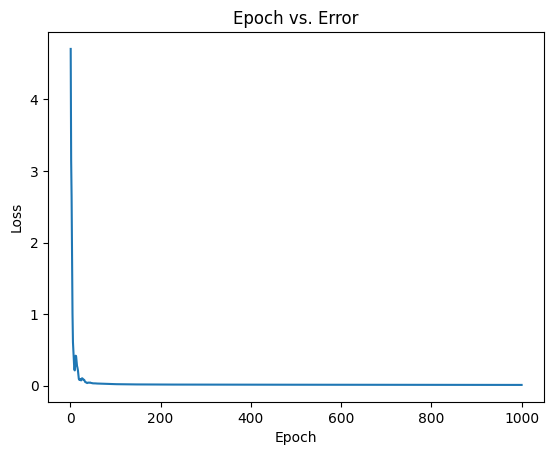

RMSE: 0.0887
R-squared: 0.7580


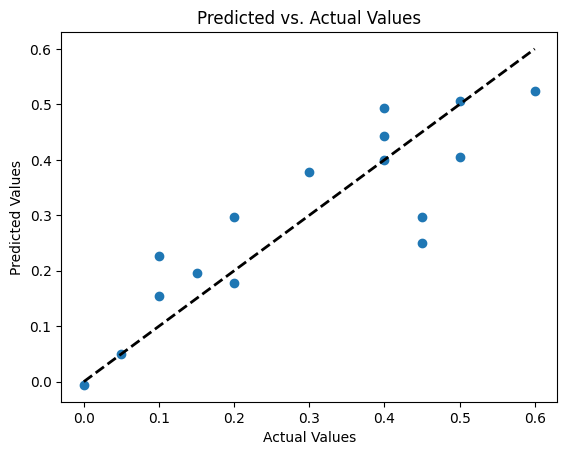

In [ ]:
# Create an instance of the model
model = MarineRiserNN()

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# (Training loop with error tracking)
num_epochs = 1000
epoch_list = []
loss_list = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_list.append(epoch + 1)
    loss_list.append(loss.item())

# Plot epoch vs. error
plt.plot(epoch_list, loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Error')
plt.show()

# ... (Model evaluation)
with torch.no_grad():
    predicted_outputs = model(X_test)
    predicted_outputs_np = predicted_outputs.detach().numpy()
    Y_test_np = Y_test.detach().numpy()

    # Calculate RMSE
    mse = mean_squared_error(Y_test_np, predicted_outputs_np)
    # Calculate RMSE by taking the square root
    rmse = mse**0.5

    # Calculate R-squared
    r2 = r2_score(Y_test_np, predicted_outputs_np)

    print(f'RMSE: {rmse:.4f}')
    print(f'R-squared: {r2:.4f}')

# Plot predicted vs. actual values
plt.scatter(Y_test_np, predicted_outputs_np)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot([Y_test_np.min(), Y_test_np.max()], [Y_test_np.min(), Y_test_np.max()], 'k--', lw=2)  # Diagonal line
plt.show()

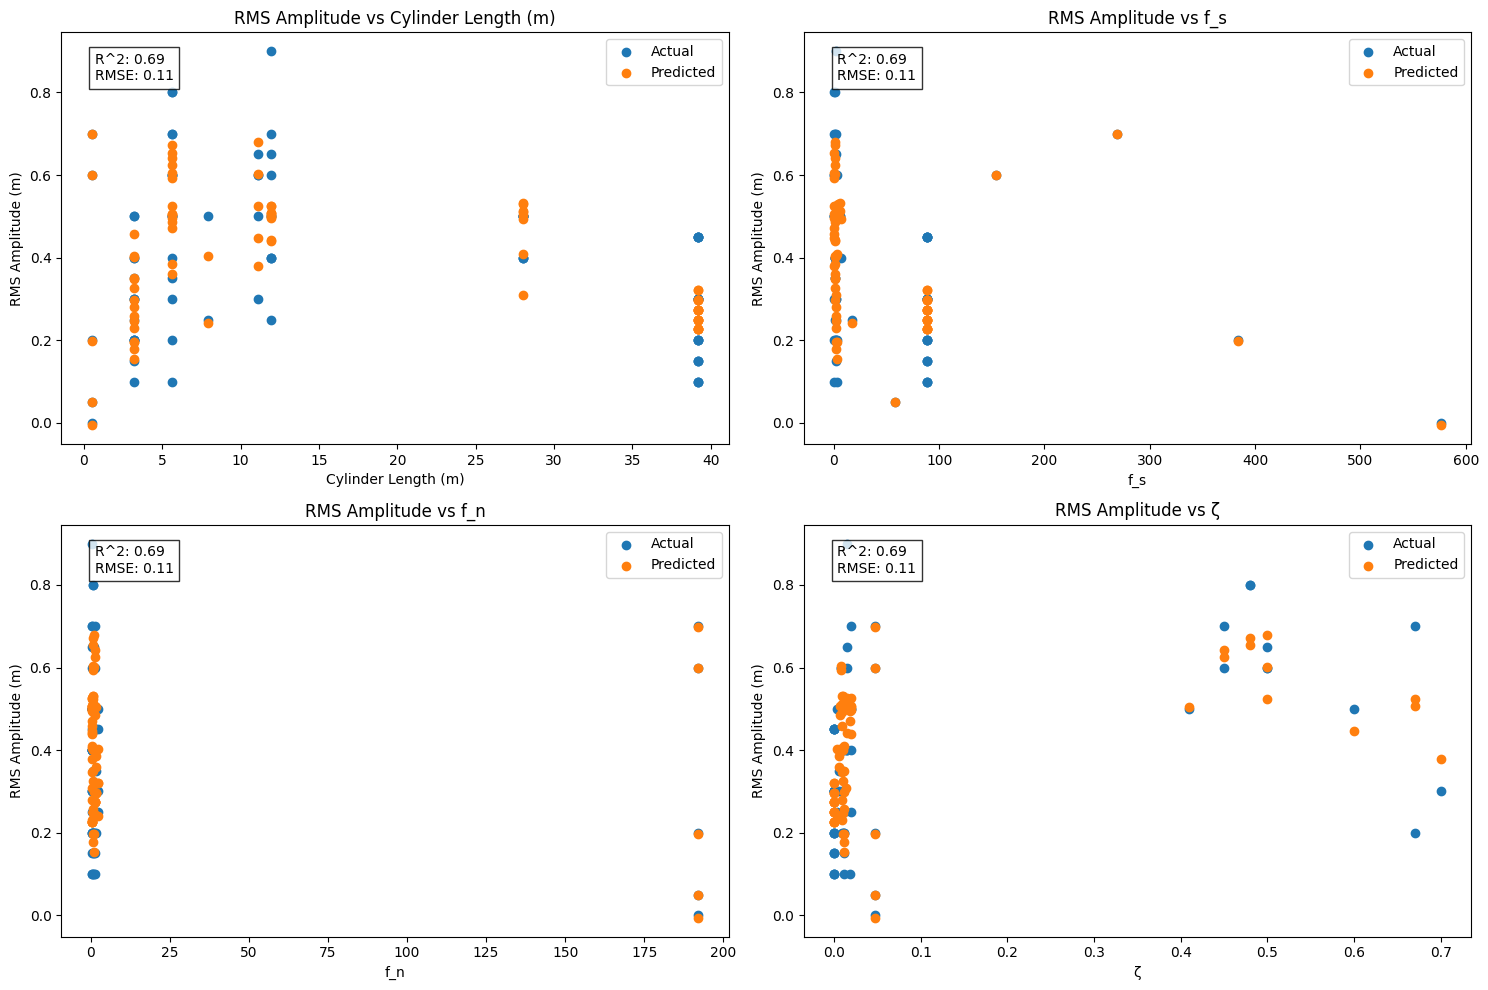

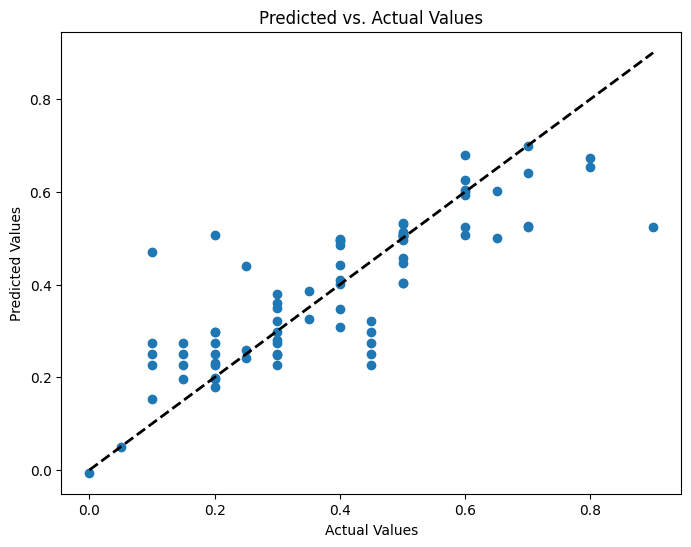

In [ ]:
# Evaluation and plotting
with torch.no_grad():
    predicted_outputs = model(X)
    predicted_outputs_np = predicted_outputs.detach().numpy()
    Y_np = Y.detach().numpy()

    input_features = ['Cylinder Length (m)', 'f_s', 'f_n', 'ζ']
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, feature_name in enumerate(input_features):
        # Extract data
        feature_values = X[:, i].numpy()
        actual_rms_amplitude = Y_np[:, 0]
        predicted_rms_amplitude = predicted_outputs_np[:, 0]

        # Calculate metrics
        mse = mean_squared_error(Y_np, predicted_outputs_np)
        # Calculate RMSE by taking the square root
        rmse = mse**0.5
        r2 = r2_score(actual_rms_amplitude, predicted_rms_amplitude)

         # Scatter plot
        axes[i].scatter(feature_values, actual_rms_amplitude, label='Actual')
        axes[i].scatter(feature_values, predicted_rms_amplitude, label='Predicted')
        axes[i].set_xlabel(feature_name)
        axes[i].set_ylabel('RMS Amplitude (m)')
        axes[i].set_title(f'RMS Amplitude vs {feature_name}')

        # Add R-squared and RMSE annotations
        axes[i].text(0.05, 0.95, f'R^2: {r2:.2f}\nRMSE: {rmse:.2f}',
                    transform=axes[i].transAxes, fontsize=10,
                    verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

        axes[i].legend()
    plt.tight_layout()
    plt.show()


    # Plot predicted vs. actual values
    plt.figure(figsize=(8,6))
    plt.scatter(Y_np[:, 0], predicted_outputs_np[:, 0])
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values')
    plt.plot([Y_np[:, 0].min(), Y_np[:, 0].max()], [Y_np[:, 0].min(), Y_np[:, 0].max()], 'k--', lw=2)  # Diagonal line
    plt.show()

In [ ]:
# Function to get user input and predict
def predict_from_input(model):
    model.eval()  # Set model to evaluation mode

    try:
        cylinder_length = float(input("Enter Cylinder Length (m): "))
        f_s = float(input("Enter f_s: "))
        f_n = float(input("Enter f_n: "))
        zeta = float(input("Enter ζ: "))

        # Create a tensor from the user inputs
        input_data = torch.tensor([cylinder_length, f_s, f_n, zeta], dtype=torch.float32)

        with torch.no_grad():  # Disable gradient calculation
            prediction = model(input_data)

        rms_amplitude = prediction[0].item()


        print(f"Predicted RMS Amplitude (m): {rms_amplitude:.4f}")


    except ValueError:
        print("Invalid input. Please enter numeric values.")

# Get user input and make prediction
predict_from_input(model)

Enter Cylinder Length (m): 0.32
Enter f_s: 0.44
Enter f_n: 0.44
Enter ζ: 0.009


IndexError: index 1 is out of bounds for dimension 0 with size 1

In [ ]:
# Save the trained model
torch.save(model.state_dict(7), file_path)
print(f"Model saved to {file_path}")

In [ ]:
# Load the model
loaded_model = MarineRiserNN()
file_path = '/content/gdrive/My Drive/Colab Notebooks/software dataset.xlsx'
loaded_model.load_state_dict(torch.load(file_path))
loaded_model.eval()  # Set the loaded model to evaluation mode

In [ ]:
# Function to get user input and predict
def predict_from_input(model):
    model.eval()  # Set model to evaluation mode

    try:
        cylinder_length = float(input("Enter Cylinder Length (m): "))
        f_s = float(input("Enter f_s: "))
        f_n = float(input("Enter f_n: "))
        zeta = float(input("Enter ζ: "))

        # Create a tensor from the user inputs
        input_data = torch.tensor([cylinder_length, f_s, f_n, zeta], dtype=torch.float32)

        with torch.no_grad():  # Disable gradient calculation
            prediction = model(input_data)

        rms_amplitude = prediction[0].item()
        mode = prediction[1].item()

        print(f"Predicted RMS Amplitude (m): {rms_amplitude:.4f}")
        print(f"Predicted Mode: {mode:.4f}")

    except ValueError:
        print("Invalid input. Please enter numeric values.")


# Get user input and make prediction using the loaded model
predict_from_input(loaded_model)